# Machine Learning Tutorial 
## Introduction to Machine Learning for Materials Science

Based on the Review paper: Schleder et al 2019 J. Phys. Mater. https://doi.org/10.1088/2515-7639/ab084b
(From DFT to Machine Learning: recent approaches to Materials Science – a review)

Authors: Gabriel R Schleder, Antonio C M Padilha, Carlos M Acosta, Marcio Costa, Adalberto Fazzio



#### Requirements
We will use Python and common libraries for open and state-of-art research 

* [Python](https://www.python.org/) 
* Numerical package [NumPy](http://www.numpy.org/) 
* Scientific package [Scipy](https://www.scipy.org/) 
* Plotting package [Matplotlib](https://matplotlib.org/)
* Scikit-learn
* ASE

In [1]:
%load_ext watermark
%watermark -a 'Version of libraries used:' -v -p numpy,matplotlib,sklearn,ase

Version of libraries used: 

CPython 3.6.2
IPython 6.1.0

numpy 1.15.2
matplotlib 3.0.0
sklearn 0.19.1
ase 3.16.2


# Now we present a more realistic problem

### This example consists of one-dimensional systems calculated by density functional (DFT) calculations, with 2 atoms/cell

#### The calculated property is the band gap, which we will use to perform classification (metal/insulator) and regression tasks

##### For more advanced importing and handling our data, we use the pandas package
(for running commands hit shift + enter)

![Materials Informatics Cycle](./MI_cycle.png "Materials Informatics Cycle")

In [2]:
import pandas as pd
# save filepath to variable for easier access
file_path = './3groups.csv'
# read the data and store data in DataFrame titled data
data = pd.read_csv(file_path) 
# If the data has missing values, dropna drops these (na: "not available")
data = data.dropna(axis=0)

In [3]:
# print a summary of the data
data.describe()

,IP1,EA1,homo1,lumo1,IP2,EA2,homo2,lumo2,r_s1,r_p1,...,column2,Nunfilled2,valence2,column_up182,Odd,Occ1,Occ2,orb1,orb2,Gap
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,...,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,-8.788562,-0.628419,-4.536862,0.906673,-6.578350,-0.414749,-3.605751,1.240263,1.236722,1.319588,...,2.934783,1.978261,8.340580,7.789855,0.159420,2.050725,1.963768,0.634058,0.585749,0.717162
std,4.180725,1.471105,2.828360,2.376447,2.580527,1.239857,1.753321,2.354752,0.543910,0.623554,...,1.760087,1.810220,8.761642,6.561837,0.990807,1.228152,1.069889,0.260122,0.290590,1.459634
min,-19.253100,-4.084800,-11.114000,-2.010400,-19.253100,-4.084800,-11.114000,-2.010400,0.404400,0.374000,...,1.000000,0.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,0.166667,0.166667,0.000000
25%,-10.740900,-0.806300,-5.609700,-1.094500,-7.825650,-0.806300,-4.080900,-1.094500,0.747300,0.834800,...,1.250000,0.000000,1.250000,1.250000,-1.000000,1.000000,1.000000,0.500000,0.333333,0.000000
50%,-7.932500,-0.586300,-4.080900,0.974700,-5.860700,-0.485900,-3.496000,0.974700,1.228050,1.212800,...,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.500000,0.500000,0.000000
75%,-5.360600,0.797200,-2.874400,3.744400,-5.142600,0.887575,-2.369200,3.273000,1.733400,1.887400,...,4.000000,4.000000,14.000000,14.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.327311
max,-4.314200,1.538800,-0.218600,4.924200,-3.846300,1.538800,-0.218600,5.419300,2.204900,2.217200,...,7.000000,5.000000,29.000000,17.000000,1.000000,5.000000,5.000000,1.000000,1.000000,6.469114


In [4]:
# print the first lines of the data
data.head()

,#Material,IP1,EA1,homo1,lumo1,IP2,EA2,homo2,lumo2,r_s1,...,column2,Nunfilled2,valence2,column_up182,Odd,Occ1,Occ2,orb1,orb2,Gap
0,Li-Tl,-5.3606,-0.5863,-2.8744,-0.9074,-5.1215,0.0916,-2.3692,2.6329,1.6578,...,3,5,27,13,1,1,1,0.5,0.166667,0.062253
1,Li-In,-5.3606,-0.5863,-2.8744,-0.9074,-5.3158,-0.0113,-2.5181,2.6968,1.6578,...,3,5,13,13,1,1,1,0.5,0.166667,0.067237
2,K-Cs,-4.3142,-0.4514,-2.3189,-0.4040,-3.8463,-0.5091,-2.0859,-0.2279,2.2049,...,1,1,1,1,1,1,1,0.5,0.500000,0.078809
3,Li-Na,-5.3606,-0.5863,-2.8744,-0.9074,-5.1426,-0.6355,-0.2186,0.9747,1.6578,...,1,1,1,1,1,1,1,0.5,0.500000,0.097558
4,Li-B,-5.3606,-0.5863,-2.8744,-0.9074,-8.1261,0.0312,-3.6067,2.4547,1.6578,...,3,5,3,13,1,1,1,0.5,0.166667,0.098736


We can visualize the correlation between desired variables to evaluate their correlation

<IPython.core.display.Javascript object>


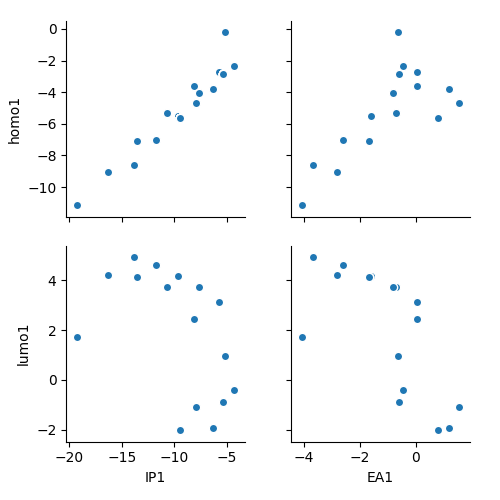

In [5]:
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
#fig = plt.figure()
sns.pairplot(data,x_vars=['IP1','EA1'],y_vars=['homo1','lumo1'])
plt.show()

## - Band gap Regression

We will try to predict the band gap using as features only atomic properties, without any structural feature

In [6]:
#selecting the prediction target
y = data.Gap
#choosing our features to be used
features = ['homo1', 'homo2','lumo1', 'lumo2',]
# we call this as "X"
X = data[features]

### Algorithm: Decision Trees

In [7]:
#Now we build our model
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
model = DecisionTreeRegressor(random_state=1)

# Fit model
model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [8]:
print("Making predictions for the first 5 examples:")
print(X.head())
print("The predictions are")
print(model.predict(X.head()))
print("And the true values are")
print(data[0:5]['Gap'])

Making predictions for the first 5 examples:
    homo1   homo2   lumo1   lumo2
0 -2.8744 -2.3692 -0.9074  2.6329
1 -2.8744 -2.5181 -0.9074  2.6968
2 -2.3189 -2.0859 -0.4040 -0.2279
3 -2.8744 -0.2186 -0.9074  0.9747
4 -2.8744 -3.6067 -0.9074  2.4547
The predictions are
[0.062253 0.067237 0.078809 0.097558 0.098736]
And the true values are
0    0.062253
1    0.067237
2    0.078809
3    0.097558
4    0.098736
Name: Gap, dtype: float64


In [9]:
#now we can test our model, comparing the true result with the predictions, via mean average error (MAE)
from sklearn.metrics import mean_absolute_error

predicted = model.predict(X)
mean_absolute_error(y, predicted)

0.0

Our model was very sucessful because we predicted examples from the training set.

Now we will split the dataset into training and test sets.

In [10]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. 
# Supplying a numeric value to the random_state argument guarantees 
# we get the same split every time we run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
model = DecisionTreeRegressor(max_leaf_nodes=5,random_state=0)
# Fit model
model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions), 'eV')

0.7822895667800455 eV


Finally, lets optimize our model

In [11]:
# compare MAE with differing values of max_leaf_nodes
for leaf_nodes in [2, 3, 5, 10, 100,1000,10000]:
    model = DecisionTreeRegressor(max_leaf_nodes=leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    val_predictions = model.predict(val_X)
    my_mae = mean_absolute_error(val_y, val_predictions)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %f" %(leaf_nodes, my_mae), 'eV')

Max leaf nodes: 2  		 Mean Absolute Error:  0.995353 eV
Max leaf nodes: 3  		 Mean Absolute Error:  0.766287 eV
Max leaf nodes: 5  		 Mean Absolute Error:  0.782290 eV
Max leaf nodes: 10  		 Mean Absolute Error:  0.561946 eV
Max leaf nodes: 100  		 Mean Absolute Error:  0.519498 eV
Max leaf nodes: 1000  		 Mean Absolute Error:  0.519498 eV
Max leaf nodes: 10000  		 Mean Absolute Error:  0.519498 eV


### We will train a more advanced regressor: Random Forests

In [12]:
from sklearn.ensemble import RandomForestRegressor

for n_estimators in [1, 2, 3, 5, 10, 100, 1000]:
    forest_model = RandomForestRegressor(n_estimators=n_estimators,random_state=2)
    forest_model.fit(train_X, train_y)
    preds = forest_model.predict(val_X)
    my_mae = mean_absolute_error(val_y, preds)
    print("Number of estimators: %d  \t\t Mean Absolute Error:  %f" %(n_estimators, my_mae), 'eV')

/home/gabrielschleder/miniconda3/envs/p3sci/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Number of estimators: 1  		 Mean Absolute Error:  0.511170 eV
Number of estimators: 2  		 Mean Absolute Error:  0.545887 eV
Number of estimators: 3  		 Mean Absolute Error:  0.448195 eV
Number of estimators: 5  		 Mean Absolute Error:  0.460090 eV
Number of estimators: 10  		 Mean Absolute Error:  0.463661 eV
Number of estimators: 100  		 Mean Absolute Error:  0.518687 eV
Number of estimators: 1000  		 Mean Absolute Error:  0.516855 eV


We can also explore features importance for the model

<IPython.core.display.Javascript object>


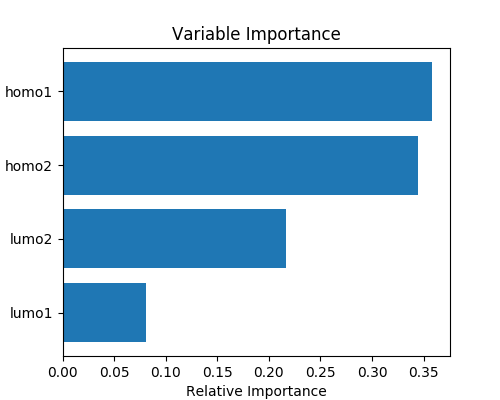

Features sorted by their score:
[(0.3577, 'homo1'), (0.3446, 'homo2'), (0.2166, 'lumo2'), (0.0811, 'lumo1')]


In [13]:
import numpy as np

fig = plt.figure(figsize=(5,4))
names = X.columns.values

print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), forest_model.feature_importances_),names), reverse=True))
importance = forest_model.feature_importances_

# Sort the feature importances 
sorted_importances = np.argsort(importance)

# Insert padding
padding = np.arange(1,len(sorted(X))+1)

# Plot the data
plt.barh(padding, importance[sorted_importances], align='center')

# Customize the plot
plt.yticks(padding, names[sorted_importances])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")

# Show the plot
plt.show()

### Learning Curves show how an algorithm improves with data (learning)

![Under/Overfitting](./biasvar.jpg "Under/Overfitting")

<IPython.core.display.Javascript object>


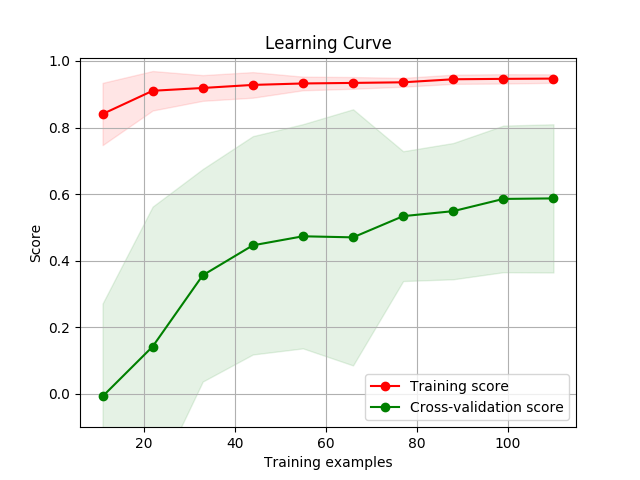

In [14]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    fig=plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curve"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = RandomForestRegressor(n_estimators=100,random_state=1)
plot_learning_curve(estimator, title, X, y, ylim=(-0.1, 1.01), cv=cv, n_jobs=4)

plt.show()

### We were using only 4 features untill now: HOMO and LUMO of atoms A and B

We can improve our results by using more features

In [15]:
#choosing our features to be used
# we call this as "X"
X = data.drop('#Material', axis=1)
#print(X)
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# compare MAE with differing values of max_leaf_nodes
for leaf_nodes in [2, 3, 5, 10, 100,1000,10000]:
    model = DecisionTreeRegressor(max_leaf_nodes=leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    val_predictions = model.predict(val_X)
    my_mae = mean_absolute_error(val_y, val_predictions)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %f" %(leaf_nodes, my_mae), 'eV')

Max leaf nodes: 2  		 Mean Absolute Error:  0.453561 eV
Max leaf nodes: 3  		 Mean Absolute Error:  0.280073 eV
Max leaf nodes: 5  		 Mean Absolute Error:  0.188991 eV
Max leaf nodes: 10  		 Mean Absolute Error:  0.140067 eV
Max leaf nodes: 100  		 Mean Absolute Error:  0.129307 eV
Max leaf nodes: 1000  		 Mean Absolute Error:  0.129307 eV
Max leaf nodes: 10000  		 Mean Absolute Error:  0.129307 eV


In [16]:
from sklearn.ensemble import RandomForestRegressor

for n_estimators in [1, 2, 3, 5, 10, 100, 1000, 5000]:
    forest_model = RandomForestRegressor(n_estimators=n_estimators,random_state=2)
    forest_model.fit(train_X, train_y)
    preds = forest_model.predict(val_X)
    my_mae = mean_absolute_error(val_y, preds)
    print("Number of estimators: %d  \t\t Mean Absolute Error:  %f" %(n_estimators, my_mae), 'eV')

Number of estimators: 1  		 Mean Absolute Error:  0.158483 eV
Number of estimators: 2  		 Mean Absolute Error:  0.147830 eV
Number of estimators: 3  		 Mean Absolute Error:  0.137672 eV
Number of estimators: 5  		 Mean Absolute Error:  0.131230 eV
Number of estimators: 10  		 Mean Absolute Error:  0.148759 eV
Number of estimators: 100  		 Mean Absolute Error:  0.127909 eV
Number of estimators: 1000  		 Mean Absolute Error:  0.134117 eV
Number of estimators: 5000  		 Mean Absolute Error:  0.135667 eV


In [17]:
from sklearn import linear_model
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
for alpha in [1e-3, 1e-1, 1e0, 1e1, 1e2]:
    model = linear_model.Lasso(alpha=alpha)
    model.fit(train_X, train_y)
    val_predictions = model.predict(val_X)
    my_mae = mean_absolute_error(val_y, val_predictions)
    print("Regularization alpha: %f  \t\t Mean Absolute Error:  %f" %(alpha, my_mae), 'eV')

Regularization alpha: 0.001000  		 Mean Absolute Error:  0.000657 eV
Regularization alpha: 0.100000  		 Mean Absolute Error:  0.064905 eV
Regularization alpha: 1.000000  		 Mean Absolute Error:  0.649047 eV
Regularization alpha: 10.000000  		 Mean Absolute Error:  1.158178 eV
Regularization alpha: 100.000000  		 Mean Absolute Error:  1.174083 eV


<IPython.core.display.Javascript object>


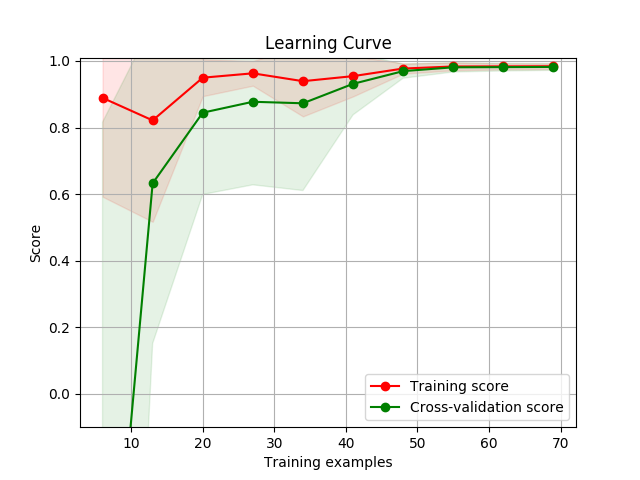

/home/gabrielschleder/miniconda3/envs/p3sci/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [18]:
title = "Learning Curve"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.5, random_state=0)

estimator = linear_model.Lasso(alpha=0.2)
plot_learning_curve(estimator, title, X, y, ylim=(-0.1, 1.01), cv=cv, n_jobs=4)

plt.show()

### Instead of regression of band gap values, we can for example predict the classification of materials into metals or insulators